# DATA SCIENCE TASK AT THE SPARKS FOUNDATION @GRIPMAY21

# TASK 4 - Exploratory Data Analysis - Terrorism
### AIM:
 - To find Hot zones of Terrorism
 - Find Security issues and insights 
 ## by- Deepika Bisht

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading dataset
data = pd.read_csv('globalterrorism.csv',encoding='latin2', engine='python')

In [4]:
# exploring data
data.shape

(181691, 135)

In [5]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### Data Cleansing

In [6]:
#First look at the column labels.
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

Certain columns can be neglected for the calculations and others have to be renamed.



In [7]:
# renaming columns
data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'city':'City', 'attacktype1_txt': 'Attacktype', 'targtype1_txt':'Targettype', 'targsubtype1_txt':'Targetsubtype', 'target1':'Target', 'weaptype1_txt':'Weapon', 'nkill':'kill', 'nwound':'Wound', 'gname':'Group', 'motive':'Motive', 'region_txt':'Region'}, inplace=True)

In [8]:
df = data[['Year', 'Month', 'Day', 'Country', 'City', 'Attacktype', 'Targettype', 'Targetsubtype', 'Target', 'Weapon', 'kill', 'Wound', 'Group', 'Motive', 'Region']]
df.head(5)

,Year,Month,Day,Country,City,Attacktype,Targettype,Targetsubtype,Target,Weapon,kill,Wound,Group,Motive,Region
0,1970,7,2,Dominican Republic,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Unknown,1.0,0.0,MANO-D,NaN,Central America & Caribbean
1,1970,0,0,Mexico,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,0.0,0.0,23rd of September Communist League,NaN,North America
2,1970,1,0,Philippines,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,1.0,0.0,Unknown,NaN,Southeast Asia
3,1970,1,0,Greece,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Explosives,NaN,NaN,Unknown,NaN,Western Europe
4,1970,1,0,Japan,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Incendiary,NaN,NaN,Unknown,NaN,East Asia


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   City           181257 non-null  object 
 5   Attacktype     181691 non-null  object 
 6   Targettype     181691 non-null  object 
 7   Targetsubtype  171318 non-null  object 
 8   Target         181055 non-null  object 
 9   Weapon         181691 non-null  object 
 10  kill           171378 non-null  float64
 11  Wound          165380 non-null  float64
 12  Group          181691 non-null  object 
 13  Motive         50561 non-null   object 
 14  Region         181691 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 20.8+ MB


In [10]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
City                434
Attacktype            0
Targettype            0
Targetsubtype     10373
Target              636
Weapon                0
kill              10313
Wound             16311
Group                 0
Motive           131130
Region                0
dtype: int64

Here you can see that there are missing values for "City", "Targetsubtype", "Target", "Weapon", "kill", "Wound", "Group" and "Motive". These are processed in the next step.

In [11]:
df['City'] = df['City'].fillna(0)
df['Targetsubtype'] = df['Targetsubtype'].fillna(0)
df['Target'] = df['Target'].fillna(0)
df['Weapon'] = df['Weapon'].fillna(0)
df['kill']=df['kill'].fillna(0)
df['Wound']= df['Wound'].fillna(0)
df['Group']= df['Group'].fillna(0)
df['Motive']= df['Motive'].fillna(0)
df.isnull().sum()

<ipython-input-11-df12e0fb8c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].fillna(0)
<ipython-input-11-df12e0fb8c0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Targetsubtype'] = df['Targetsubtype'].fillna(0)
<ipython-input-11-df12e0fb8c0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Year             0
Month            0
Day              0
Country          0
City             0
Attacktype       0
Targettype       0
Targetsubtype    0
Target           0
Weapon           0
kill             0
Wound            0
Group            0
Motive           0
Region           0
dtype: int64

Now,there are no longer any missing values.

In [12]:
df.describe()

,Year,Month,Day,kill,Wound
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296
std,13.259430,3.388303,8.814045,11.227057,34.309747
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


The average year is around 2003. The average month is june and the day is 15th. On an average two people are killed and 3 are wounded.
The highest entries are in year 2017 with 1570 people being killed and 8191 being wounded.

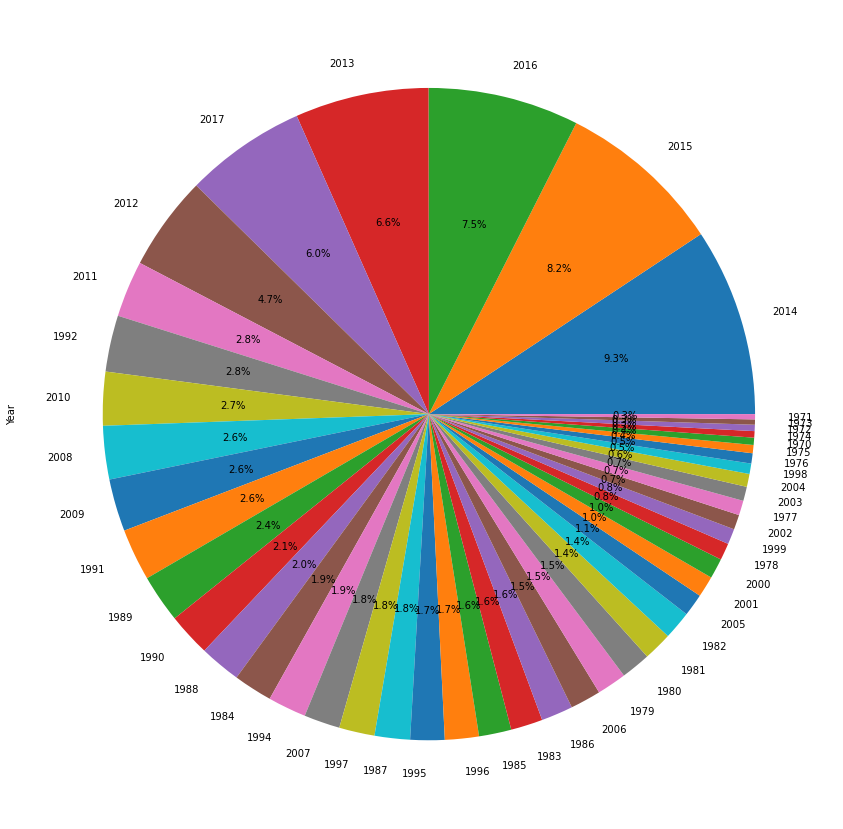

In [11]:
plt.figure(figsize=(40,15))
df['Year'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.show()

It can be seen here that most of the attacks were carried out in 2014 and 2015.

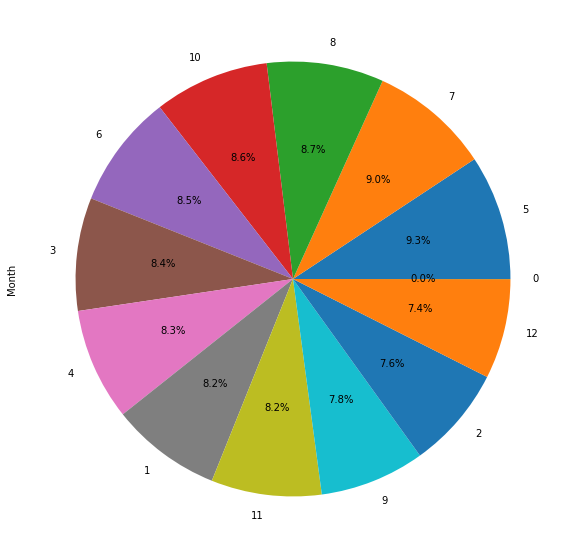

In [12]:
plt.figure(figsize=(20,10))
df['Month'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.show()

Terrorist attacks seem to be distributed relatively evenly over the different months. However, most of them take place in May and least in November.

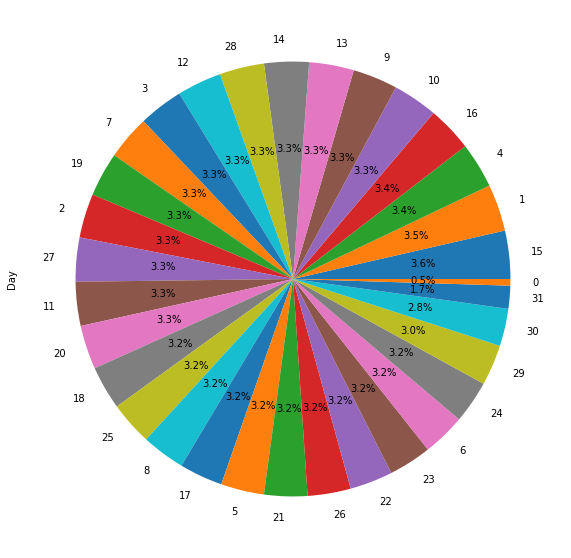

In [13]:
plt.figure(figsize=(15,10))
df['Day'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.show()

A relatively uniform distribution can also be seen during the day. Most terrorist attacks take place on the 15th and least on the 31st day of the month.

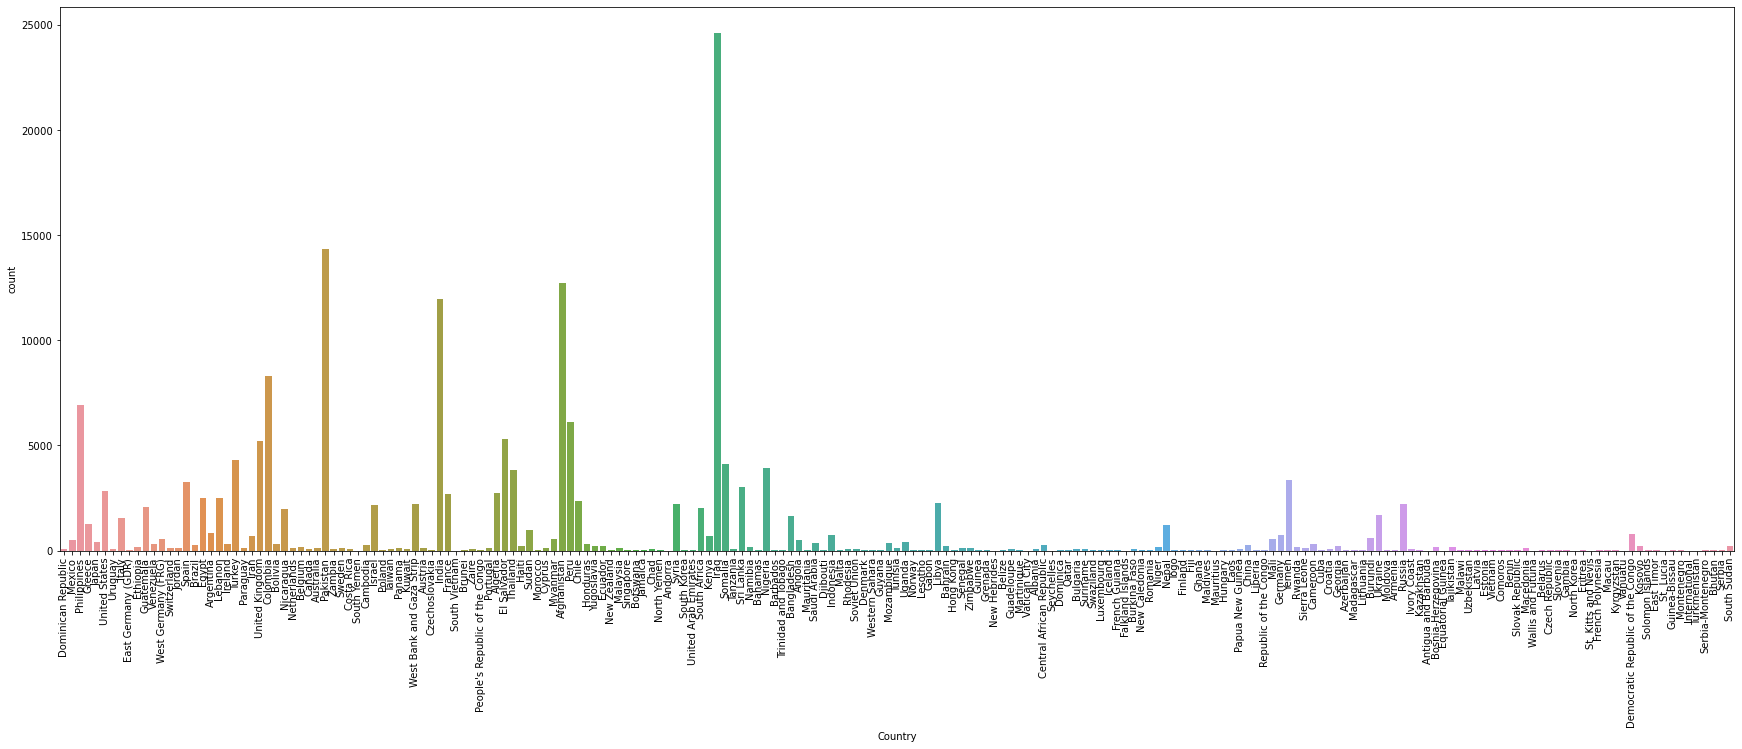

In [14]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['Country'])
plt.xticks(rotation=90)
plt.show()

Here it can be seen that most of the attacks took place in "Iraq". The following calculation shows the top 5 countries.

In [15]:
dftop5_countries = df['Country'].value_counts()[:5]

print(dftop5_countries)

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64


It can be said that Iraq, Pakistan, Afghanistan, India and Colombia are the most common terrorist acts.

In [16]:
dftop5_cities = df['City'].value_counts()[1:6]
print(dftop5_cities)

Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Belfast    2171
Name: City, dtype: int64


The top 5 cities where terrorist attacks occur most frequently are Baghdad, Karachi, Lima, Mosul and Belfast

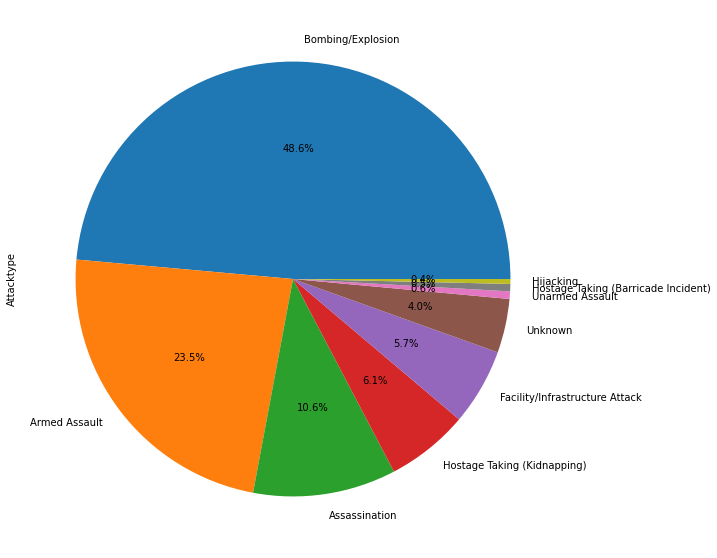

In [17]:
plt.figure(figsize=(30,10))
df['Attacktype'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.show()

The most common method is Bombing / Explosion, very rarely an Unarmed Assault, Hostage taking and Hijacking takes place as a terrorist attack.

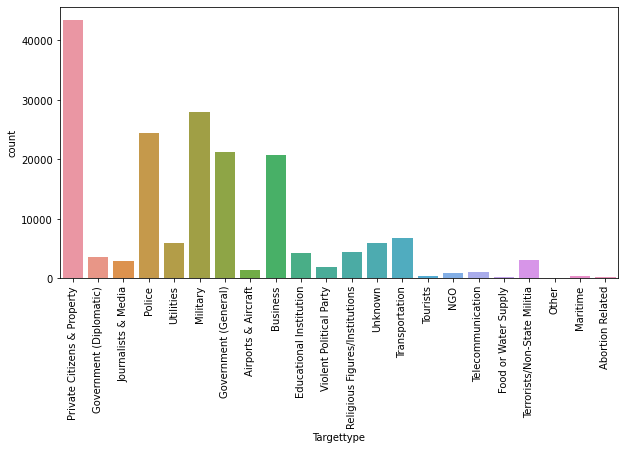

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Targettype'])
plt.xticks(rotation=90)
plt.show()

Most target types are Private Citizens & Property, Military, Police, Government and Businesses, the rarest are for example Abortion Related.

In [19]:
dftop10_targetsub = df['Targetsubtype'].value_counts()[:10]
print(dftop10_targetsub)

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
0                                                          10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Name: Targetsubtype, dtype: int64


With the target subtype, the data can be viewed even more specifically. Here it can be seen that Civilian, Police, Military and Government are particularly affected.

In [20]:
dftop10_target = df['Target'].value_counts()[:10]
print(dftop10_target)

Civilians        6461
Unknown          5918
Soldiers         3157
Patrol           2942
Checkpoint       2905
Vehicle          2785
Officers         1787
Village          1679
Military Unit    1533
Bus              1335
Name: Target, dtype: int64


Even looking at the target, it can be seen that Civilians and Soldiers are most affected.

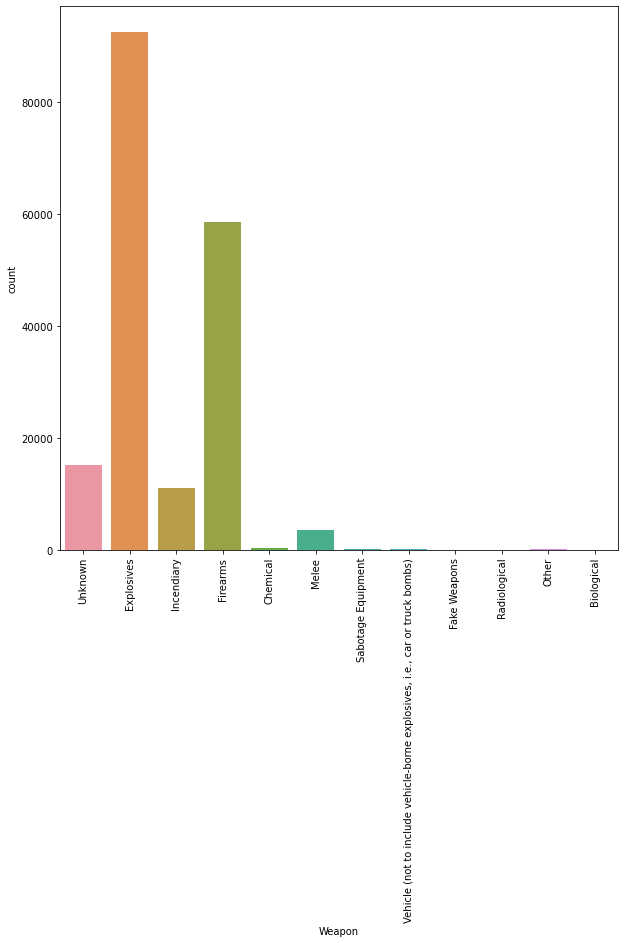

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Weapon'])
plt.xticks(rotation=90)
plt.show()

Attacks most often take place with the help of Explosives and Firearms. Especially rarely with the help of Fake Weapons, Radiological and Biological weapons

In [22]:
dftop10_kill = df['kill'].value_counts()[:10]
print(dftop10_kill)

0.0     98462
1.0     36576
2.0     14147
3.0      7738
4.0      4961
5.0      3565
6.0      2552
7.0      1960
8.0      1495
10.0     1192
Name: kill, dtype: int64


It can be seen that most often none, one, or two are killed.

In [23]:
dftop10_wound = df['Wound'].value_counts()[:10]
print(dftop10_wound)

0.0     119586
1.0      16033
2.0      10219
3.0       7303
4.0       4880
5.0       3820
6.0       2856
7.0       2435
8.0       1821
10.0      1379
Name: Wound, dtype: int64


Most of the people involved are not wounded followed by one and two.

In [24]:
dftop10_group = df['Group'].value_counts()[:10]
print(dftop10_group)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64


If the terrorist organization is considered, the topic most often concerns Tailiban, Islamic State of Iraq and the Levant and Shining Path.

In [25]:
dftop10_motive = df['Motive'].value_counts()[:10]
print(dftop10_motive)

0                                                                                                                                                                                                                                                       131130
Unknown                                                                                                                                                                                                                                                  14889
The specific motive for the attack is unknown.                                                                                                                                                                                                           14430
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                         

In the case of motives, it can be seen that in most cases the motive is unknown. Nevertheless, there are possible explanations

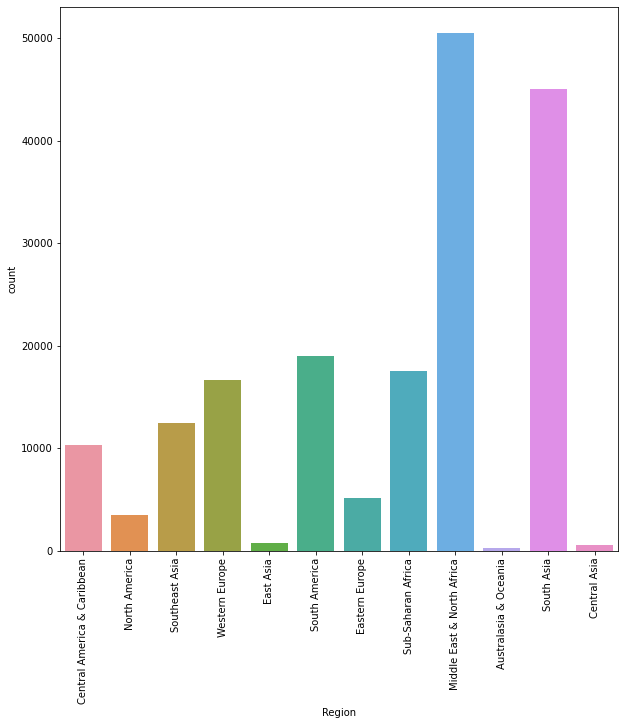

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Region'])
plt.xticks(rotation=90)
plt.show()

The most frequent attacks were considered in "Middle East & North Africa" and "South Asia". "Australasia & Oceania" was the place where terrorist attacks took place the least.

An exploratory data analysis was carried out in the representations shown. 
Most of the attacks took place in 2014 and 2015, the most frequent month being May and the most common day within the month being the 15th. Most of the attacks took place in Iraq, Pakistan, Afghanistan, India and Colombia. Looking at the regions, it can be seen that most of the attacks took place in "Middle east & North Africa" and "South Asia". The most common type of attack is "bombing / explosion" and "Private Citizens & Property", "Military", "Police", "Government" and "Businesses" are most frequently attacked. In this regard, the most commonly used weapons are "explosives" and "firearms". The terrorist organizations Tailiban Islamic State of Iraq and the Levant and Shining Path are mentioned most frequently. Although the motive is mostly unknown, there are sometimes attempts to explain it. When looking at the number of people killed and injured, 0 is the most followed by 1 and 2.

### Bivarate Analysis

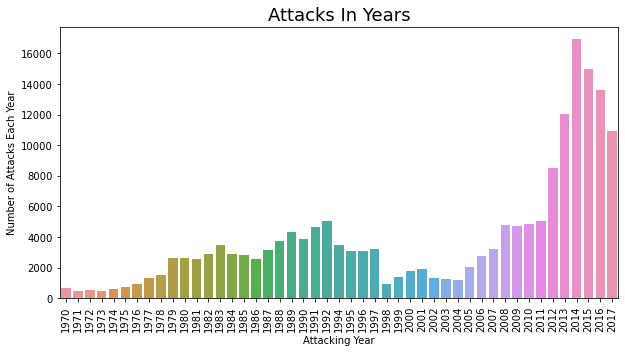

In [31]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (10,5))
sns.barplot(x = year, y = years_count)
plt.xticks(rotation = 90)
plt.xlabel('Attacking Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attacks In Years', fontsize=18)
plt.show()

It can be said that from 1970 to 1992 there was an increase in terrorist attacks. At the height of this period there were almost 6,000 attacks. Then until 2004 there was a decline. From 2004 to 2014, the number of annual attacks increased enormously. At its peak in 2014, there were over 160,000 attacks. In 2015 and 2016 finally around 140,000 and in 2017 around 110,000 attacks.

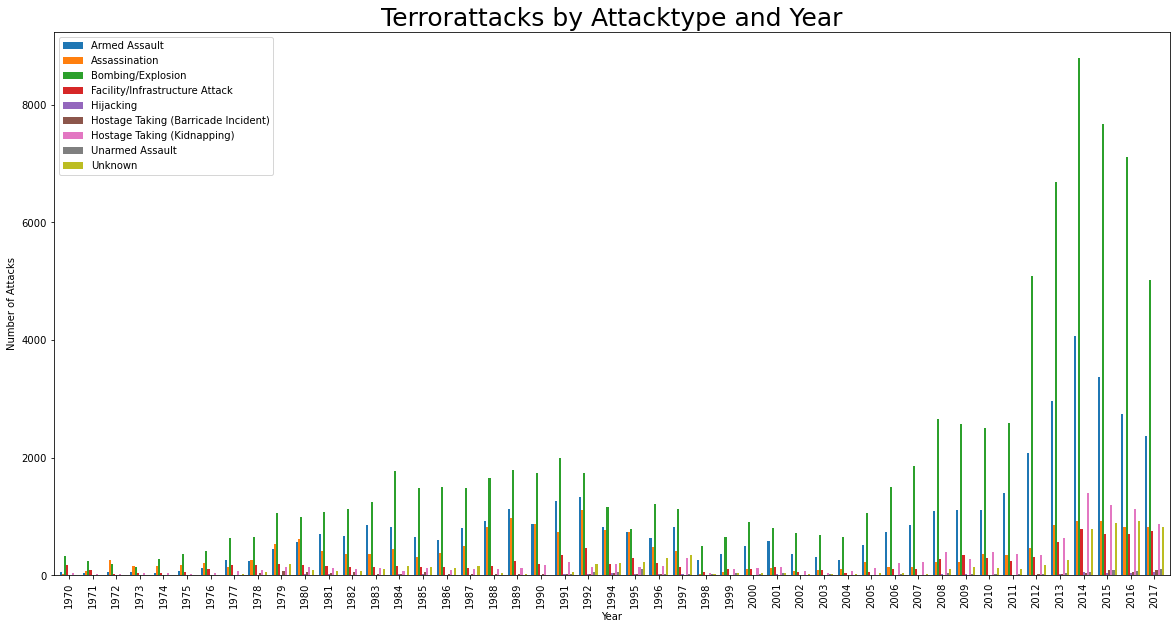

In [37]:
#The Attacktype by Year.
pd.crosstab(df['Year'], df['Attacktype']).plot(kind='bar', stacked=False, width=0.8, figsize=(20,10))
plt.title('Terrorattacks by Attacktype and Year', fontsize=25)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()
plt.show()

It can be seen here that the attack type "bombing / explosion" occurred most frequently in almost every year. In 1972 and 1973 "assassination" was the most common type of attack.

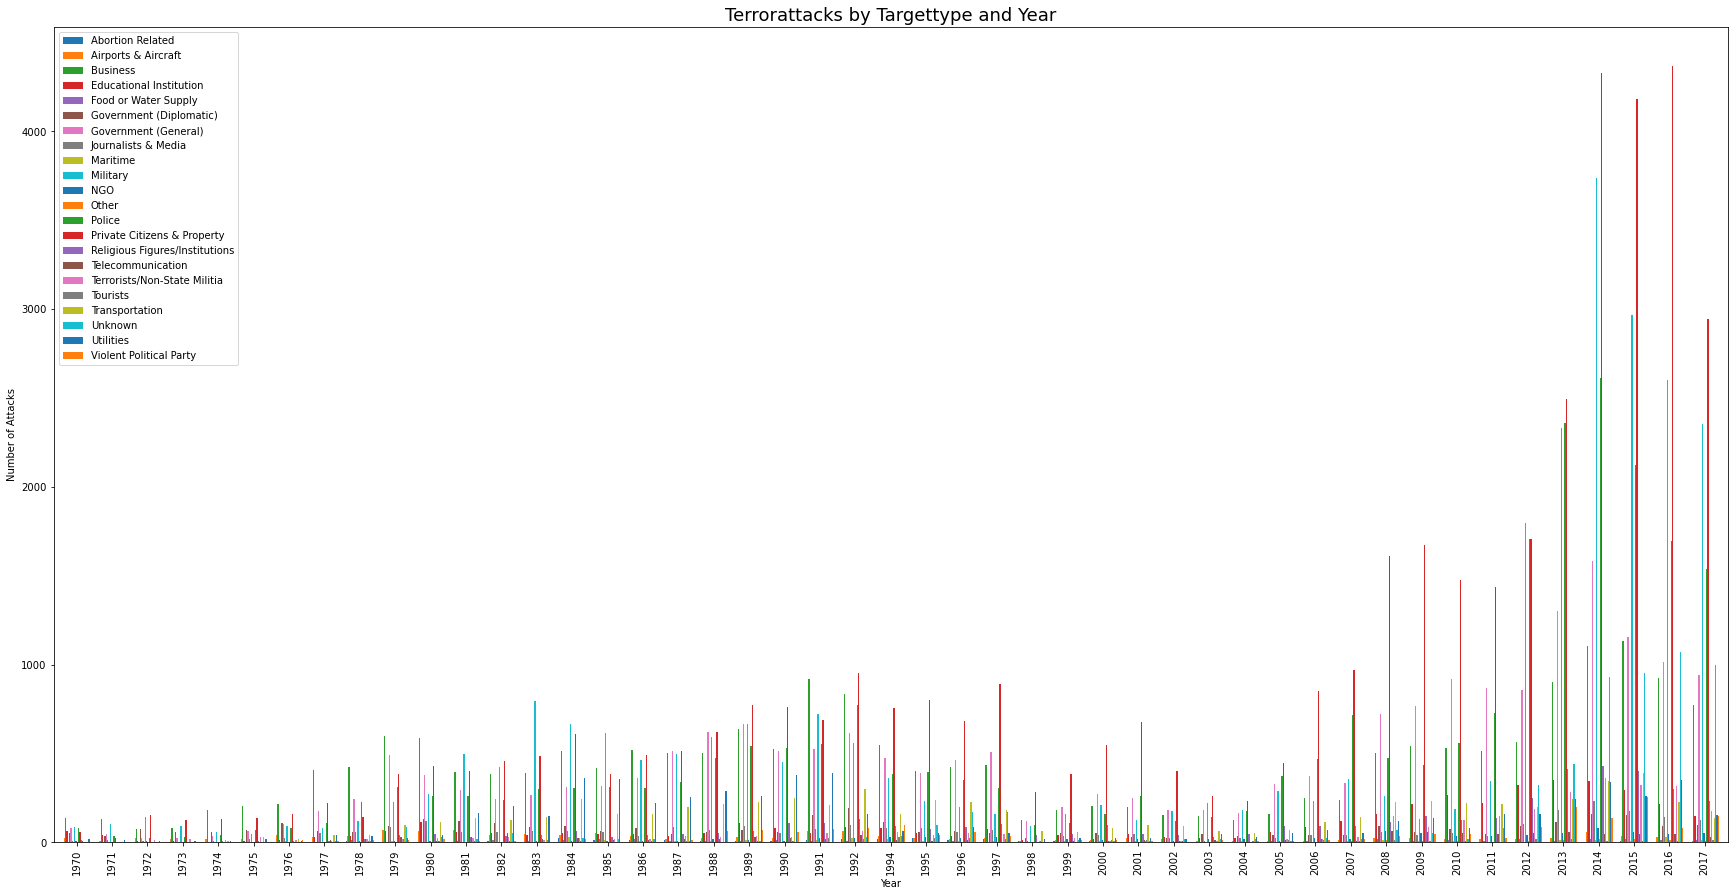

In [78]:
#The Targettype by Year.
pd.crosstab(df['Year'], df['Targettype']).plot(kind='bar', stacked=False, width=0.8, figsize=(30,15))
plt.title('Terrorattacks by Targettype and Year', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()
plt.show()

Here you can see that in almost all years between 1970 and 1980, business received the most attacks. Between 1981 and 1987, the military was mostly affected. Terrorists / Non-State Militia were targets in 1988 and Private Citizens & Property targets in 1989 and 1990 respectively. From 1990 onwards, private citizens & property and the military are particularly affected.

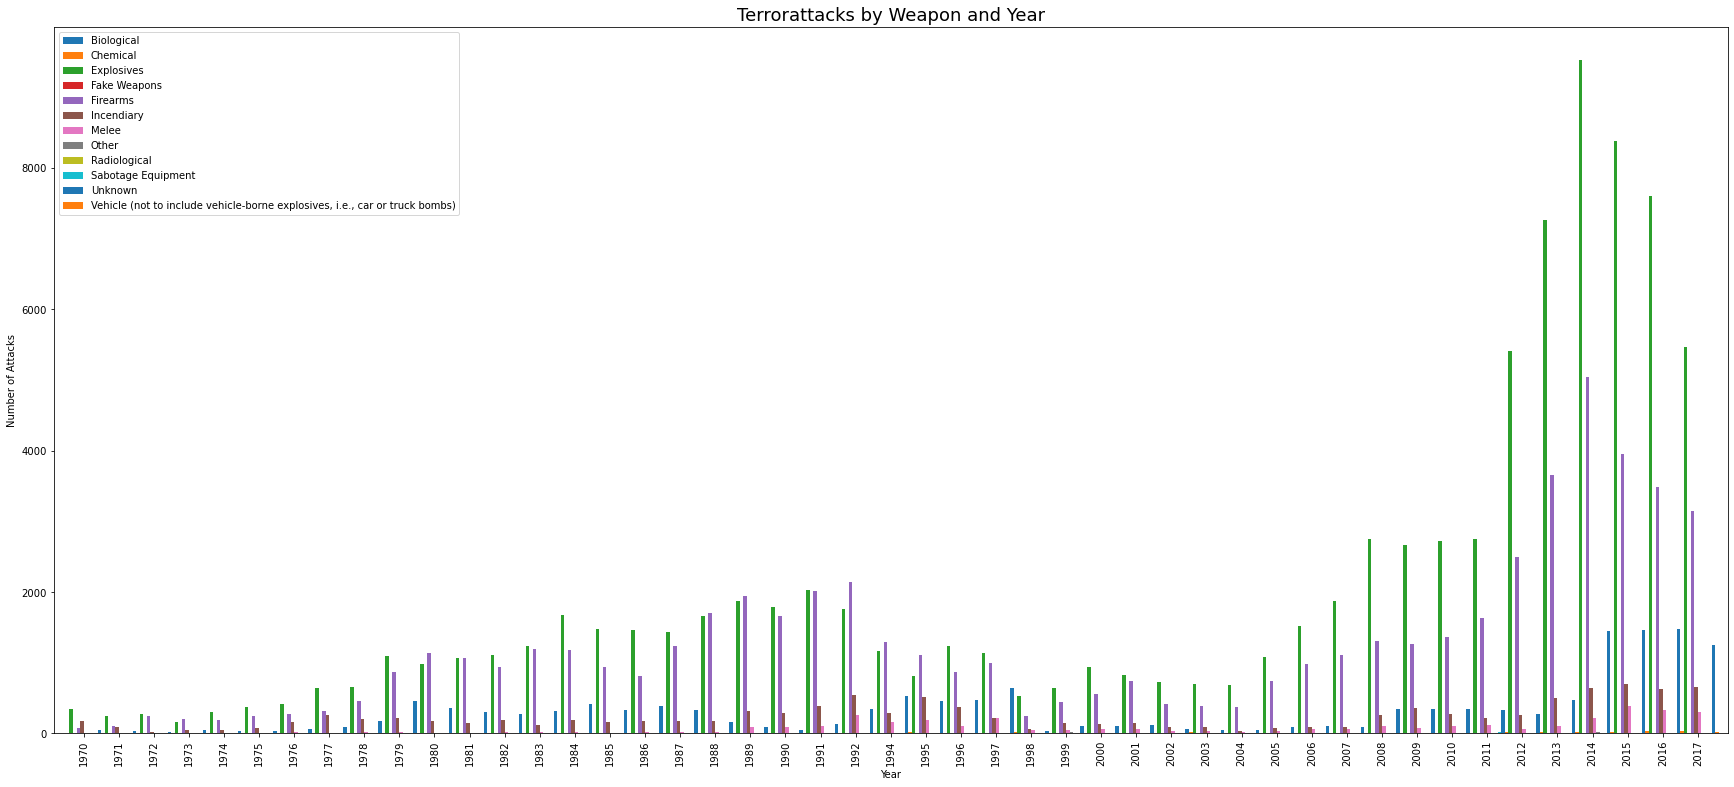

In [79]:
#The Weapon by Year.
pd.crosstab(df['Year'], df['Weapon']).plot(kind='bar', stacked=False, width=1.2, figsize=(30,13))
plt.title('Terrorattacks by Weapon and Year', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()
plt.show()

 The most common weapons are explosives and firearms. Both are at the top almost every year.

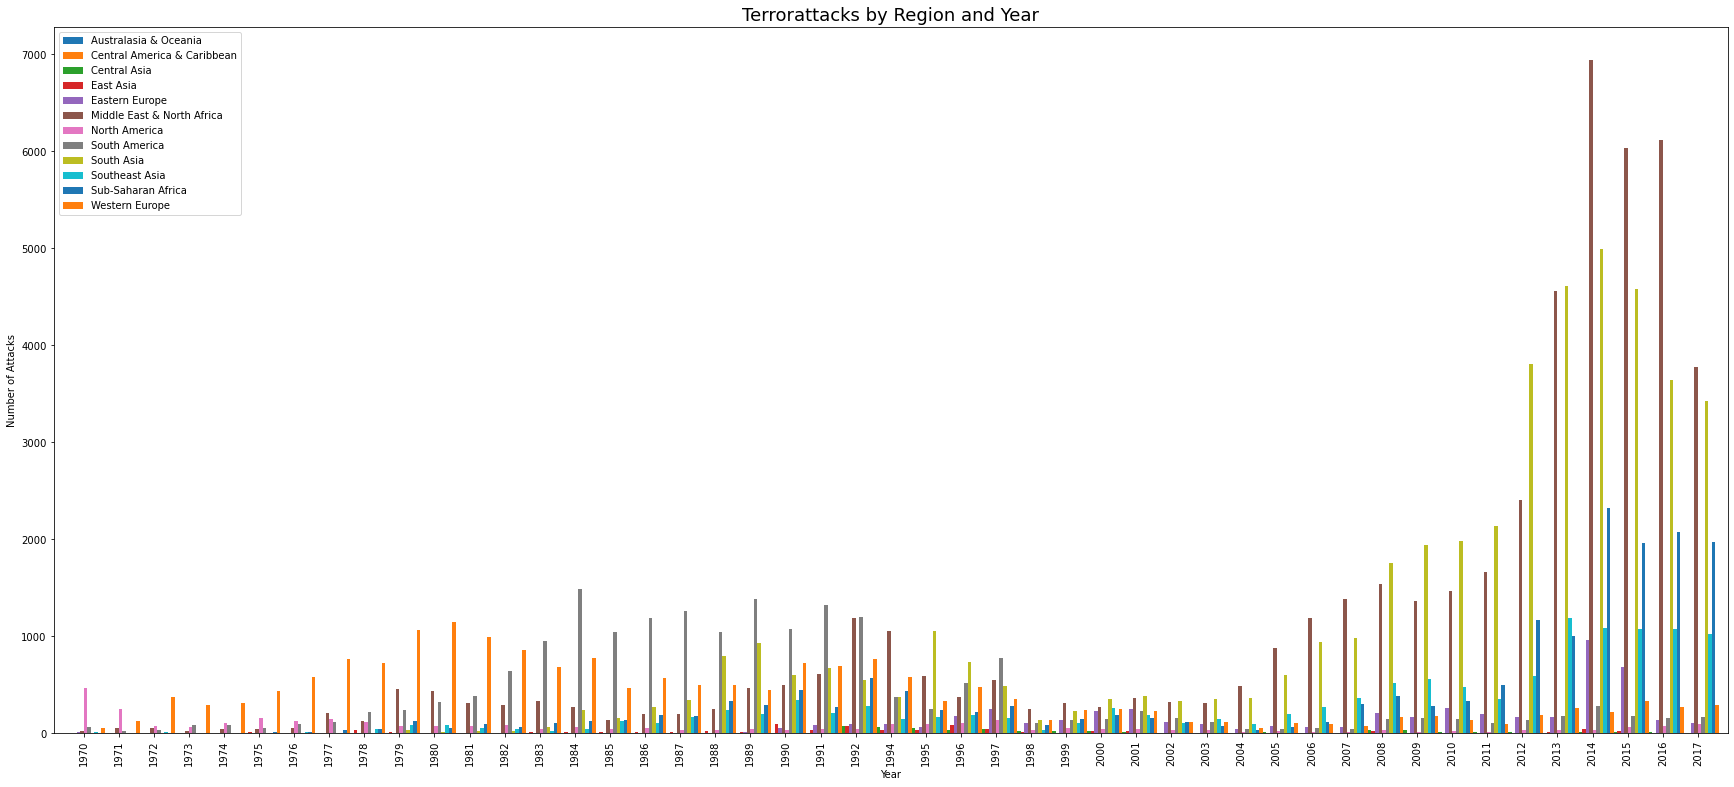

In [80]:
#Region by Year.
pd.crosstab(df['Year'], df['Region']).plot(kind='bar', stacked=False, width=1.2, figsize=(30,13))
plt.title('Terrorattacks by Region and Year', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()
plt.show()

Looking at the terrorist attacks over the years and regions, it can be seen that between 1970 and 1980 it was mostly North America and Central America & Caribbean that were affected. Between 1980 and 1990, most of the attacks took place in Central America & Caribbean and South America. When looking at the years 1990 to 2000, South America, Middle East & North Africa, and South Asia are particularly affected. Between 2000 and 2017, Middle East & North Africa and South Asia stand out in particular.

Text(0.5, 0, 'Year')

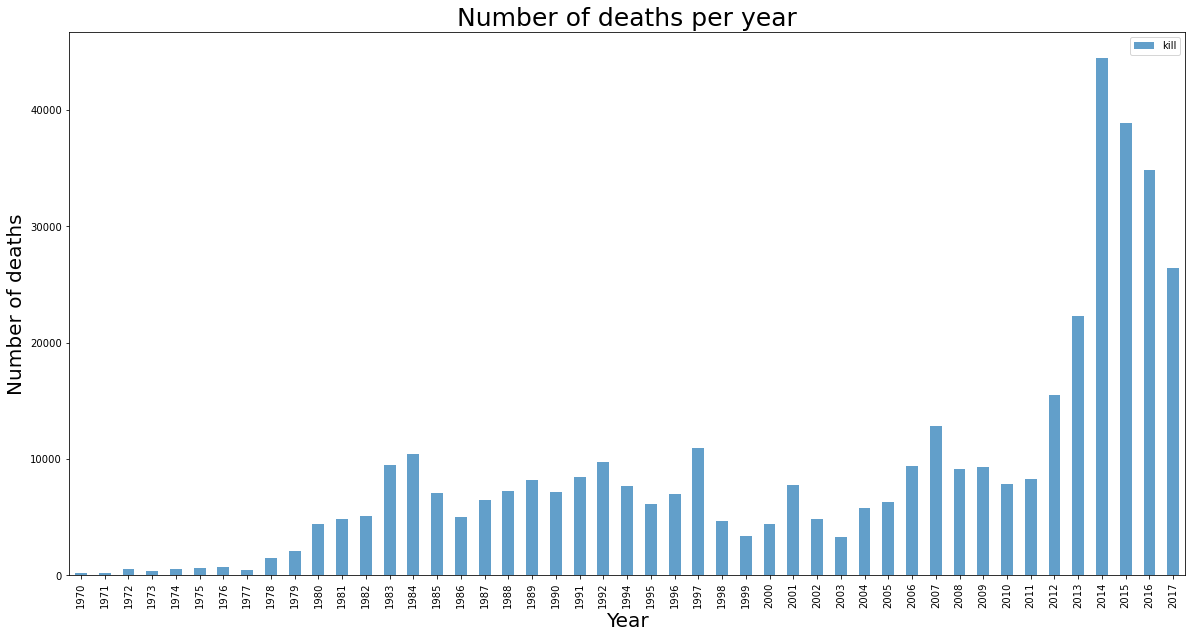

In [81]:
Year_kill = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
Year_kill.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 90)
plt.title("Number of deaths per year",fontsize=25)
plt.ylabel("Number of deaths",fontsize=20)
plt.xlabel('Year',fontsize=20)

It can be seen that most people died of terrorist attacks in 2014, 2015, 2016, 2017 and 2013.


## CONCLUSION-
In this exploratory data analysis,on the subject of "Global Terrorism". The following variables were taken into account:
Year,Month,Day,Country,City,Attacktype,Targettype,Targetsubtype,Target,Weapon,kills,wounds,Groups,Motive,Region 

#### The results are shown-.

- Years with most attacks: 2014 (over 160.000), 2015 (round 150.000)
- Month with most attacks: May
- Day with most attacks: 15th

#### - Top 5 Countries with most attacks (Hot zones):
- Iraq
- Pakistan
- Afghanistan
- India
- Columbia

#### Top 5 Cities with most attacks (Hot zones):
- Baghdad
- Karachi
- Lima
- Mosul
- Belfast

##### Hot zones of terrorism - Regions with most attacks: Middle East & North Africa, South Asia

## Security issues and insights gained -
##### Attacktypes: Bombing, Explosion, Armed Assault
#### Top 5 Targettypes:
- Private Citizens & Property
- Military
- Police
- Government
- Businesses
##### Weapons: Explosives, Firearms
##### Top 5 terrorist groups with most attacks:
- Taliban
- Islamic State of Iraq and the Levant
- Shining Path
- Farabundo Marti National Liberation Front
- Al-Shabaab

